In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import seaborn as sns

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.models import resnet50, ResNet50_Weights
import os

# Using original data (without augmentation)

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
resnet.fc = torch.nn.Identity()

resnet.eval()

if torch.cuda.is_available():
    resnet.cuda()


def load_data(directory):
    dataset = datasets.ImageFolder(directory, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=4, shuffle=False)
    return dataloader


def extract_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, label_batch in dataloader:
            if torch.cuda.is_available():
                inputs = inputs.cuda()
            feature_batch = resnet(inputs)
            features.extend(feature_batch.cpu().numpy())
            labels.extend(label_batch.numpy())
    return features, labels






In [4]:
dataloader = load_data('/content/drive/MyDrive/PaHaW/PaHaW/PD-Prediction-main/PD-Prediction-main/PaHaW_visualization/PaHaW_visualization')

features,labels = extract_features(dataloader)
pd_features = [feature for feature, label in zip(features, labels) if label == 0]
health_features = [feature for feature, label in zip(features, labels) if label == 1]
print(dataloader.dataset.classes)
print(len(health_features))

['Health', 'PD']
36


In [5]:
len(features)

72

1. Accuracy: 0.4667
2. Precision: 0.3333
3. Recall: 0.6000
4. F1 Score: 0.4286


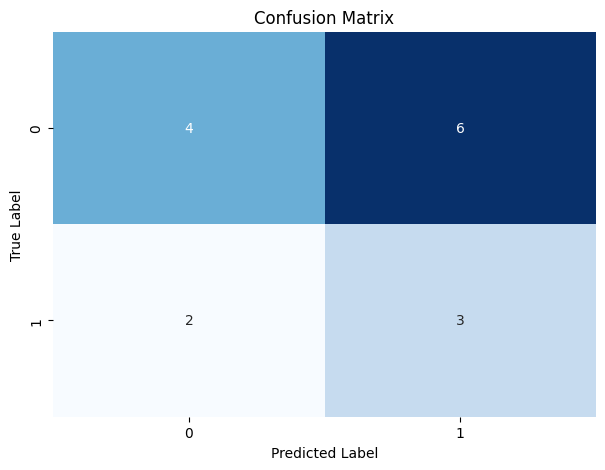

<ipython-input-6-a889fcc50943>:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(base_fpr, fpr, tpr)


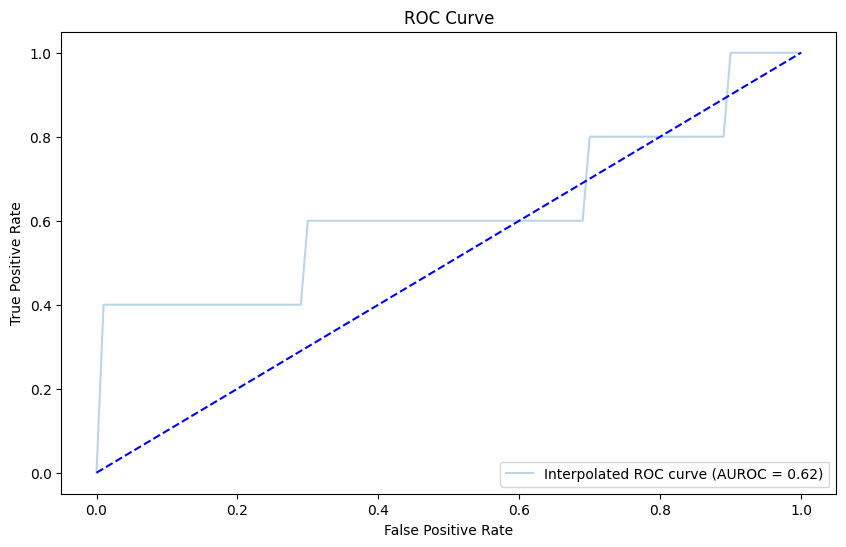

6. AUROC Value: 0.6200


In [6]:
features = np.array(features)
labels = np.array(labels)

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print(f'1. Accuracy: {accuracy:.4f}')
print(f'2. Precision: {precision:.4f}')
print(f'3. Recall: {recall:.4f}')
print(f'4. F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculating the AUROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
from scipy import interp
from numpy import linspace

# Get the average and interpolated values
base_fpr = linspace(0, 1, 101)
interp_tpr = interp(base_fpr, fpr, tpr)
interp_tpr[0] = 0.0

# Plot the interpolated ROC curve
plt.figure(figsize=(10, 6))
plt.plot(base_fpr, interp_tpr, alpha=0.3, label='Interpolated ROC curve (AUROC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


print(f'6. AUROC Value: {roc_auc:.4f}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 153MB/s]


Epoch 1, Loss: 0.7641387273867924
Epoch 2, Loss: 0.8579390421509743
Epoch 3, Loss: 0.7517420093218485
Epoch 4, Loss: 0.4770127425591151
Epoch 5, Loss: 0.4103734247386456
Epoch 6, Loss: 1.054143176553771
Epoch 7, Loss: 0.597310941418012
Epoch 8, Loss: 1.1777537452677886
Epoch 9, Loss: 0.5399340589841207
Epoch 10, Loss: 0.5720098673055569
Epoch 11, Loss: 0.42505761568124095
Epoch 12, Loss: 0.41772829995801053
Epoch 13, Loss: 0.16873811747257908
Epoch 14, Loss: 0.7115366206349184
Epoch 15, Loss: 0.687385402371486
Epoch 16, Loss: 0.28284183039019506
Epoch 17, Loss: 0.456061273564895
Epoch 18, Loss: 0.28954955643663804
Epoch 19, Loss: 0.542471316534405
Epoch 20, Loss: 0.38777699031634255
Epoch 21, Loss: 0.4009174764932444
Epoch 22, Loss: 0.5721103985173007
Epoch 23, Loss: 0.27618967552358903
Epoch 24, Loss: 0.3814336811657995
Epoch 25, Loss: 0.40469168542573847
Epoch 26, Loss: 0.4345042240495483
Epoch 27, Loss: 0.2126236938017731
Epoch 28, Loss: 0.02917851114179939
Epoch 29, Loss: 0.3107943

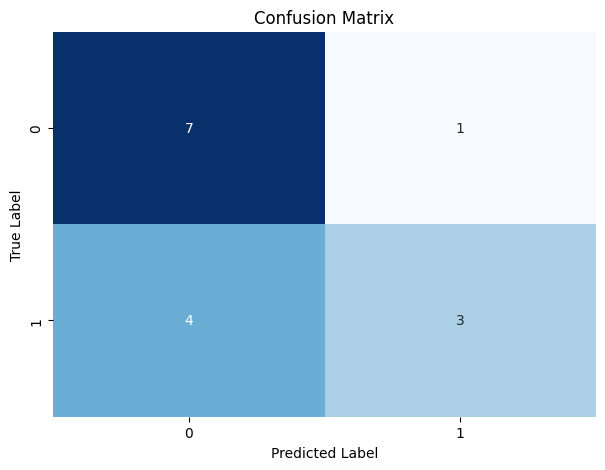

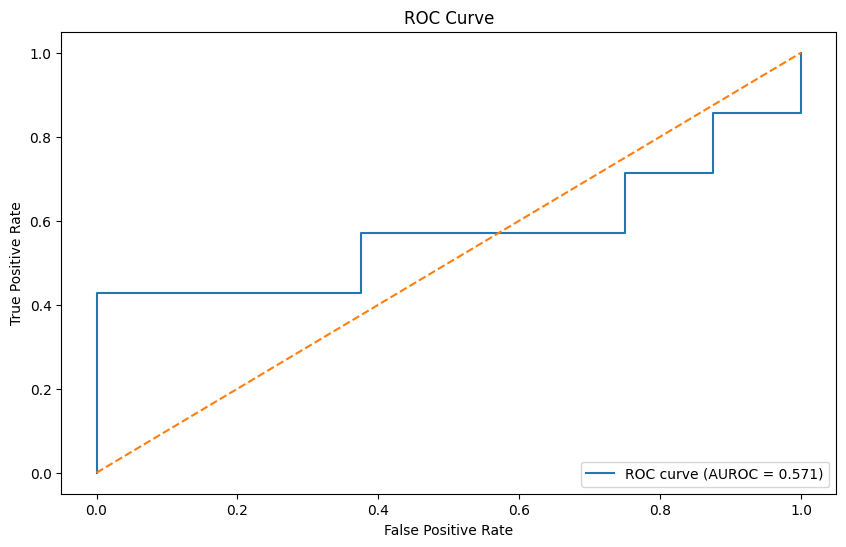

6. AUROC Value: 0.5714


In [3]:
# Data preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset
dataset_path = '/content/drive/MyDrive/PaHaW/PaHaW/PD-Prediction-main/PD-Prediction-main/PaHaW_visualization/PaHaW_visualization'
dataset = datasets.ImageFolder(dataset_path, transform=preprocess)

# Split dataset
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42, stratify=dataset.targets)
train_dataset = Subset(dataset, indices=train_indices)
val_dataset = Subset(dataset, indices=val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Model setup
resnet = models.resnet50(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)  # 2 classes

if torch.cuda.is_available():
    resnet = resnet.cuda()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_dataloader)}')

print('Finished Training')

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            if torch.cuda.is_available():
                inputs = inputs.cuda()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            scores = torch.softmax(outputs, dim=1)[:, 1]

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(scores.cpu().numpy())

    return y_true, y_pred, y_scores

y_true, y_pred, y_scores = evaluate_model(resnet, val_dataloader)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_scores)

print(f'1. Accuracy: {accuracy:.4f}')
print(f'2. Precision: {precision:.4f}')
print(f'3. Recall: {recall:.4f}')
print(f'4. F1 Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'6. AUROC Value: {roc_auc:.4f}')


In [5]:
!pip install efficientnet_pytorch


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 113MB/s] 


Loaded pretrained weights for efficientnet-b0
Epoch 1, Loss: 0.7141587217648824
Epoch 2, Loss: 0.6725518663724264
Epoch 3, Loss: 0.6520350217819214
Epoch 4, Loss: 0.6324021776517232
Epoch 5, Loss: 0.5754154662291209
Epoch 6, Loss: 0.5822340706984203
Epoch 7, Loss: 0.5544527192910512
Epoch 8, Loss: 0.6337587575117747
Epoch 9, Loss: 0.4872495214144389
Epoch 10, Loss: 0.4867314755916595
Epoch 11, Loss: 0.4560612658659617
Epoch 12, Loss: 0.40758138298988345
Epoch 13, Loss: 0.4605903555949529
Epoch 14, Loss: 0.31348900198936464
Epoch 15, Loss: 0.35987593829631803
Epoch 16, Loss: 0.3318780303001404
Epoch 17, Loss: 0.246265975634257
Epoch 18, Loss: 0.32935502926508586
Epoch 19, Loss: 0.2536953198413054
Epoch 20, Loss: 0.2149687148630619
Epoch 21, Loss: 0.34992334619164467
Epoch 22, Loss: 0.2163587215046088
Epoch 23, Loss: 0.24488241796692212
Epoch 24, Loss: 0.26603544255097705
Epoch 25, Loss: 0.19655077184240025
Epoch 26, Loss: 0.15373542526115974
Epoch 27, Loss: 0.12688684687018395
Epoch 28,

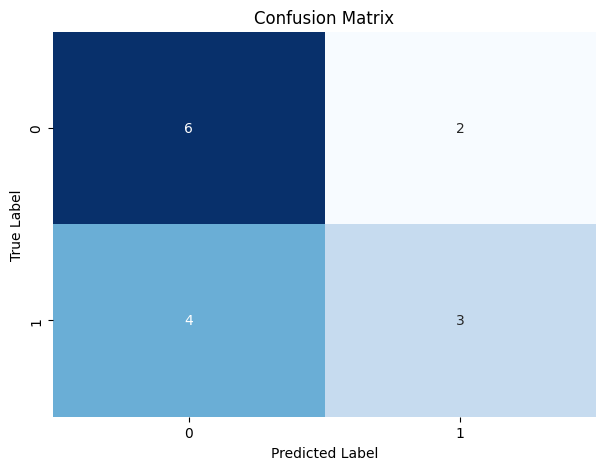

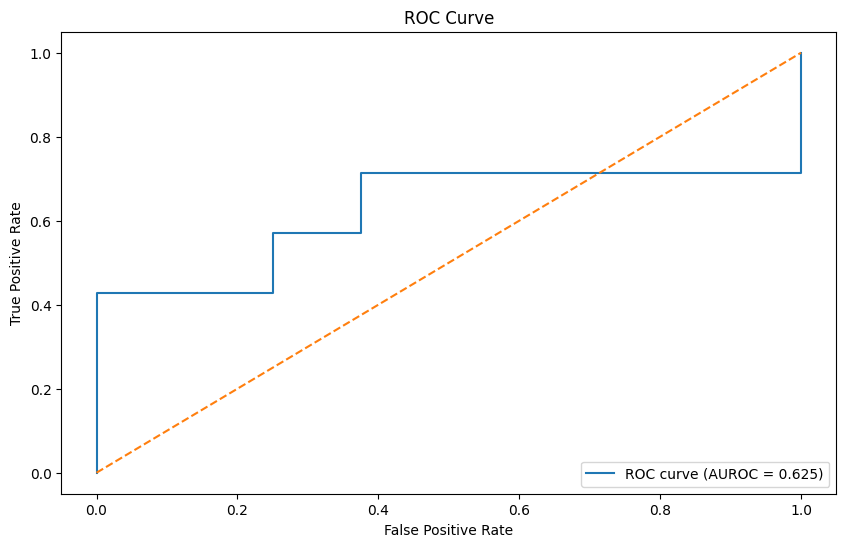

6. AUROC Value: 0.6250


In [7]:
from efficientnet_pytorch import EfficientNet
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset
dataset_path = '/content/drive/MyDrive/PaHaW/PaHaW/PD-Prediction-main/PD-Prediction-main/PaHaW_visualization/PaHaW_visualization'
dataset = datasets.ImageFolder(dataset_path, transform=preprocess)

# Split dataset
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42, stratify=dataset.targets)
train_dataset = Subset(dataset, indices=train_indices)
val_dataset = Subset(dataset, indices=val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Load EfficientNet model
model_name = 'efficientnet-b0'  # You can choose from efficientnet-b0 to efficientnet-b7
efficientnet = EfficientNet.from_pretrained(model_name)
num_ftrs = efficientnet._fc.in_features
efficientnet._fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification

if torch.cuda.is_available():
    efficientnet = efficientnet.cuda()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(efficientnet.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    efficientnet.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()

        outputs = efficientnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_dataloader)}')

print('Finished Training')

# Evaluation function remains the same as used for ResNet
y_true, y_pred, y_scores = evaluate_model(efficientnet, val_dataloader)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_scores)

print(f'1. Accuracy: {accuracy:.4f}')
print(f'2. Precision: {precision:.4f}')
print(f'3. Recall: {recall:.4f}')
print(f'4. F1 Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'6. AUROC Value: {roc_auc:.4f}')


# Using augmented data

In [8]:
dataloader = load_data('/content/drive/MyDrive/PaHaW/PaHaW/PD-Prediction-main/PD-Prediction-main/data_augmentation/complete_data')

features,labels = extract_features(dataloader)
pd_features = [feature for feature, label in zip(features, labels) if label == 0]
health_features = [feature for feature, label in zip(features, labels) if label == 1]
print(dataloader.dataset.classes)
print(len(health_features))

['Health', 'PD']
216


1. Accuracy: 0.8391
2. Precision: 0.7907
3. Recall: 0.8718
4. F1 Score: 0.8293


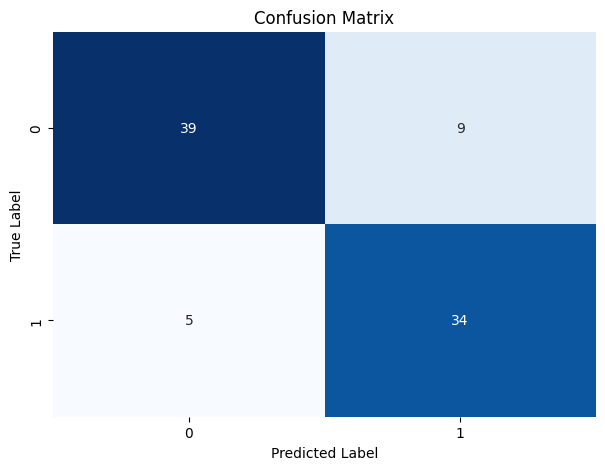

<ipython-input-9-a889fcc50943>:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  interp_tpr = interp(base_fpr, fpr, tpr)


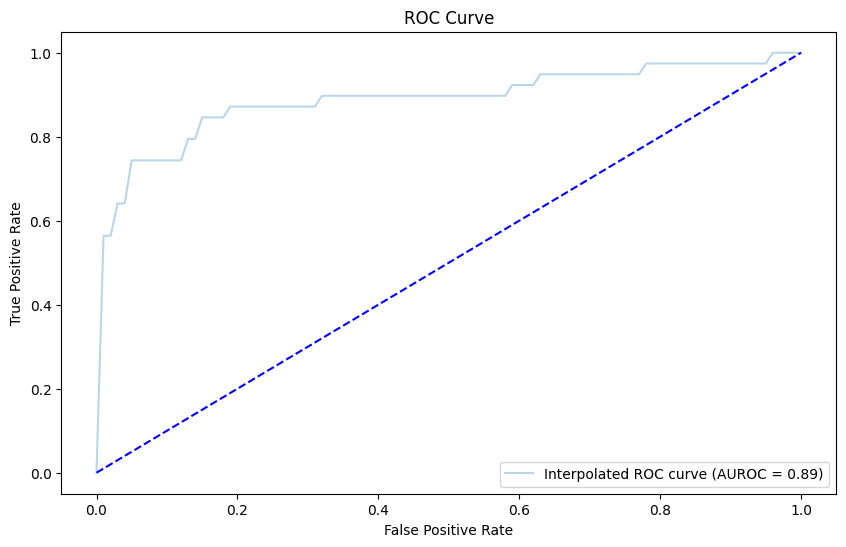

6. AUROC Value: 0.8921


In [9]:
features = np.array(features)
labels = np.array(labels)

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print(f'1. Accuracy: {accuracy:.4f}')
print(f'2. Precision: {precision:.4f}')
print(f'3. Recall: {recall:.4f}')
print(f'4. F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculating the AUROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
from scipy import interp
from numpy import linspace

# Get the average and interpolated values
base_fpr = linspace(0, 1, 101)
interp_tpr = interp(base_fpr, fpr, tpr)
interp_tpr[0] = 0.0

# Plot the interpolated ROC curve
plt.figure(figsize=(10, 6))
plt.plot(base_fpr, interp_tpr, alpha=0.3, label='Interpolated ROC curve (AUROC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


print(f'6. AUROC Value: {roc_auc:.4f}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 155MB/s]


Epoch 1, Loss: 1.0768882185220718
Epoch 2, Loss: 0.7450229095659037
Epoch 3, Loss: 0.7618259504523085
Epoch 4, Loss: 0.5365673489226349
Epoch 5, Loss: 0.4924857479241816
Epoch 6, Loss: 0.363744354539219
Epoch 7, Loss: 0.3427900329162634
Epoch 8, Loss: 0.4499717534856935
Epoch 9, Loss: 0.3978700305378043
Epoch 10, Loss: 0.35587084238770705
Epoch 11, Loss: 0.37471411423456596
Epoch 12, Loss: 0.22788044825014284
Epoch 13, Loss: 0.19108860294171343
Epoch 14, Loss: 0.1534468693412498
Epoch 15, Loss: 0.186734365823213
Epoch 16, Loss: 0.16419400583856322
Epoch 17, Loss: 0.18246999307235853
Epoch 18, Loss: 0.18106693145183408
Epoch 19, Loss: 0.20459549237931168
Epoch 20, Loss: 0.11304264420649471
Epoch 21, Loss: 0.05796096482345615
Epoch 22, Loss: 0.10969306416702511
Epoch 23, Loss: 0.10587719193451982
Epoch 24, Loss: 0.12327469689216218
Epoch 25, Loss: 0.04254743924743132
Epoch 26, Loss: 0.0404648206926161
Epoch 27, Loss: 0.02252582958969689
Epoch 28, Loss: 0.028809132165594654
Epoch 29, Loss

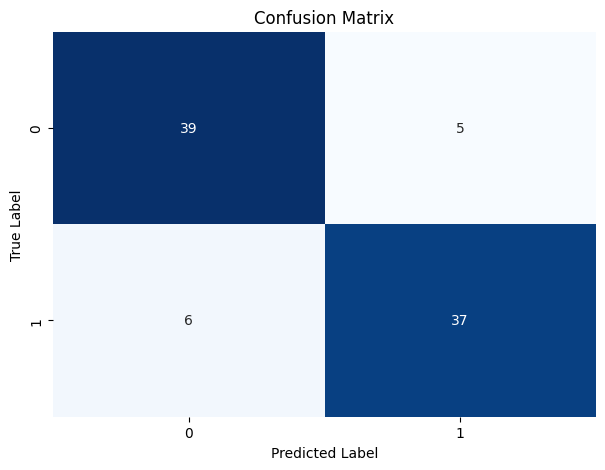

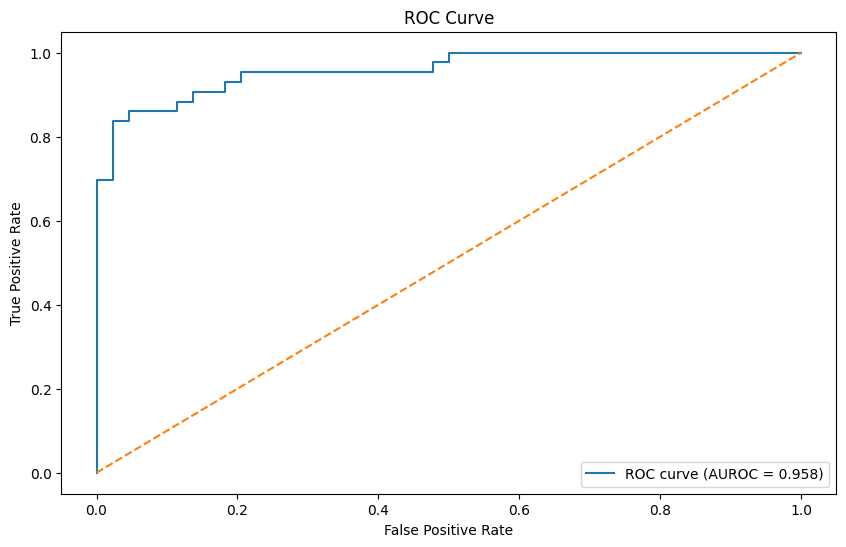

6. AUROC Value: 0.9582


In [3]:
# Data preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset
dataset_path = '/content/drive/MyDrive/PaHaW/PaHaW/PD-Prediction-main/PD-Prediction-main/data_augmentation/complete_data'
dataset = datasets.ImageFolder(dataset_path, transform=preprocess)

# Split dataset
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42, stratify=dataset.targets)
train_dataset = Subset(dataset, indices=train_indices)
val_dataset = Subset(dataset, indices=val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Model setup
resnet = models.resnet50(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)  # 2 classes

if torch.cuda.is_available():
    resnet = resnet.cuda()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_dataloader)}')

print('Finished Training')

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            if torch.cuda.is_available():
                inputs = inputs.cuda()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            scores = torch.softmax(outputs, dim=1)[:, 1]

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(scores.cpu().numpy())

    return y_true, y_pred, y_scores

y_true, y_pred, y_scores = evaluate_model(resnet, val_dataloader)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_scores)

print(f'1. Accuracy: {accuracy:.4f}')
print(f'2. Precision: {precision:.4f}')
print(f'3. Recall: {recall:.4f}')
print(f'4. F1 Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'6. AUROC Value: {roc_auc:.4f}')


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 248MB/s]


Loaded pretrained weights for efficientnet-b0
Epoch 1, Loss: 0.7158188223838806
Epoch 2, Loss: 0.6529878059337879
Epoch 3, Loss: 0.6055786969332859
Epoch 4, Loss: 0.5464322501900553
Epoch 5, Loss: 0.5144445342921663
Epoch 6, Loss: 0.49613932443076164
Epoch 7, Loss: 0.42244788113681747
Epoch 8, Loss: 0.3577330976553347
Epoch 9, Loss: 0.34885791500752
Epoch 10, Loss: 0.3020441620771227
Epoch 11, Loss: 0.2553403489505765
Epoch 12, Loss: 0.2723843063623912
Epoch 13, Loss: 0.26312147623634546
Epoch 14, Loss: 0.2920616225649913
Epoch 15, Loss: 0.23583490751020011
Epoch 16, Loss: 0.18710777987779556
Epoch 17, Loss: 0.18487895677005337
Epoch 18, Loss: 0.12694105824011367
Epoch 19, Loss: 0.16981639569336227
Epoch 20, Loss: 0.17434012024374357
Epoch 21, Loss: 0.16303541304961103
Epoch 22, Loss: 0.09038342220772957
Epoch 23, Loss: 0.10800094737259179
Epoch 24, Loss: 0.12725028450381354
Epoch 25, Loss: 0.11955952559913584
Epoch 26, Loss: 0.15178656488276976
Epoch 27, Loss: 0.11383817233171999
Epoc

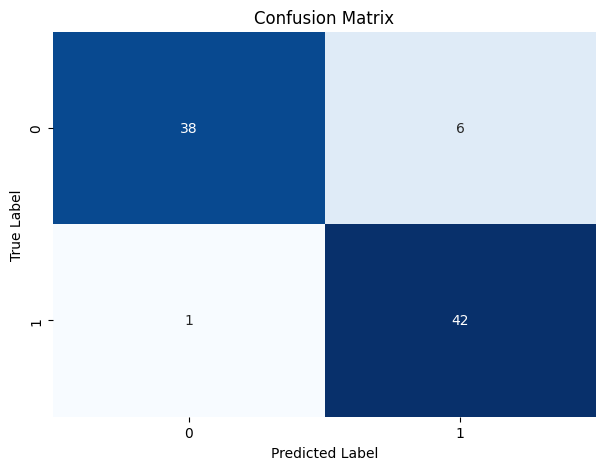

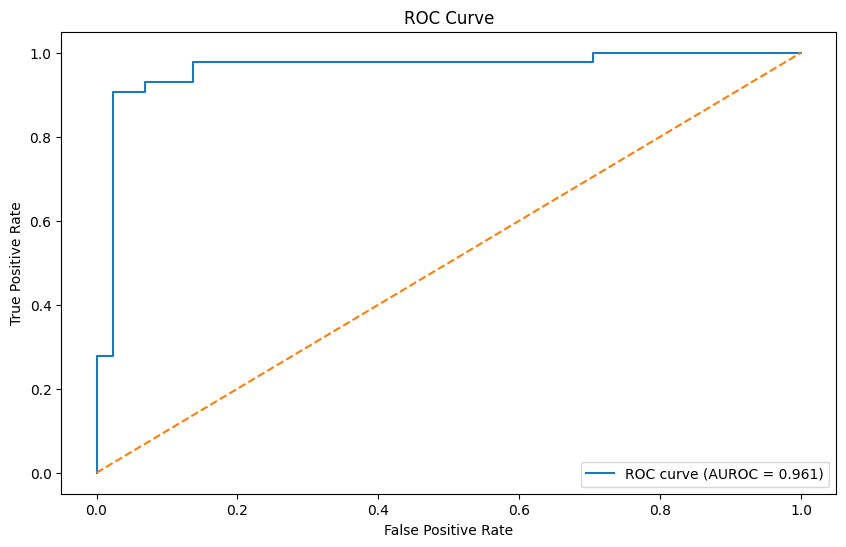

6. AUROC Value: 0.9614


In [6]:
from efficientnet_pytorch import EfficientNet
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset
dataset_path = '/content/drive/MyDrive/PaHaW/PaHaW/PD-Prediction-main/PD-Prediction-main/data_augmentation/complete_data'
dataset = datasets.ImageFolder(dataset_path, transform=preprocess)

# Split dataset
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42, stratify=dataset.targets)
train_dataset = Subset(dataset, indices=train_indices)
val_dataset = Subset(dataset, indices=val_indices)

# Dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Load EfficientNet model
model_name = 'efficientnet-b0'  # You can choose from efficientnet-b0 to efficientnet-b7
efficientnet = EfficientNet.from_pretrained(model_name)
num_ftrs = efficientnet._fc.in_features
efficientnet._fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification

if torch.cuda.is_available():
    efficientnet = efficientnet.cuda()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(efficientnet.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    efficientnet.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()

        outputs = efficientnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_dataloader)}')

print('Finished Training')

# Evaluation function remains the same as used for ResNet
y_true, y_pred, y_scores = evaluate_model(efficientnet, val_dataloader)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_scores)

print(f'1. Accuracy: {accuracy:.4f}')
print(f'2. Precision: {precision:.4f}')
print(f'3. Recall: {recall:.4f}')
print(f'4. F1 Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'6. AUROC Value: {roc_auc:.4f}')
